In [1]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('spam.csv', encoding='utf-8', encoding_errors='replace')

In [12]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2653,ham,Sorry da:)i was thought of calling you lot of ...,NaN,NaN,NaN
5135,ham,Sorry * was at the grocers.,NaN,NaN,NaN
3198,ham,No de.am seeing in online shop so that i asked.,NaN,NaN,NaN
5530,ham,I think that tantrum's finished so yeah I'll b...,NaN,NaN,NaN
2656,ham,Feel like trying kadeem again? :V,NaN,NaN,NaN


In [13]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [16]:
df.sample(5)

,v1,v2
2420,ham,Oic... Then better quickly go bathe n settle d...
4919,ham,"G says you never answer your texts, confirm/deny"
3185,ham,Happy birthday to you....dear.with lots of lov...
2105,ham,I fetch yun or u fetch?
477,ham,Tension ah?what machi?any problem?


In [17]:
#rename cols
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [18]:
df.sample(5)

,target,text
5175,ham,Raji..pls do me a favour. Pls convey my Birthd...
4427,ham,Aiyar dun disturb u liao... Thk u have lots 2 ...
3576,ham,Yeah confirmed for you staying at that weekend
3658,ham,Wait.i will come out.. &lt;#&gt; min:)
3624,ham,I want to tel u one thing u should not mistake...


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
df['target']= encoder.fit_transform(df['target'])

In [22]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [23]:
#check for duplicated values
df.duplicated().sum()

403

In [25]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [26]:
df.duplicated().sum()

0

In [27]:
df.shape

(5169, 2)

## 2. EDA

In [28]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

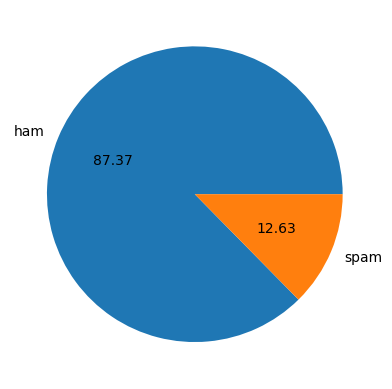

In [29]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

conclusion = data is imbalanced

In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prashant\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [33]:
df['num_characters'] = df['text'].apply(len)

In [34]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [41]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [51]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456761,1.966531
std,58.174846,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [54]:
#ham
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123782,1.820195
std,56.356802,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [55]:
#spam
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [56]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

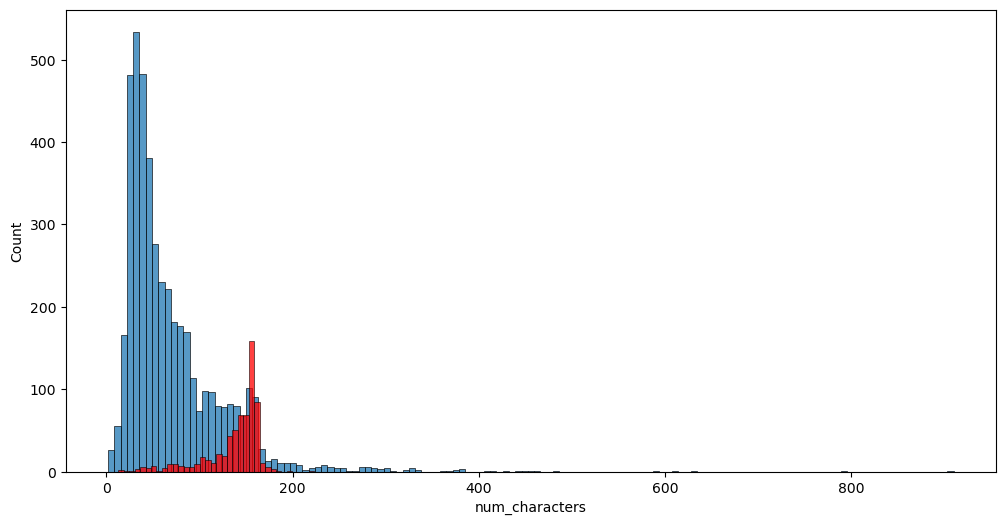

In [60]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

conclusion = mostly spam messages has high no. of characters than ham messages

<Axes: xlabel='num_words', ylabel='Count'>

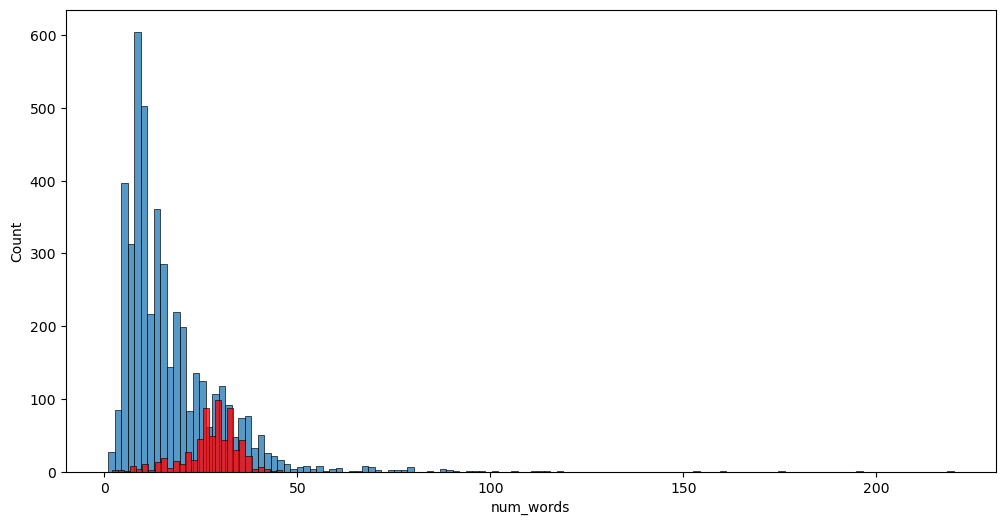

In [61]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

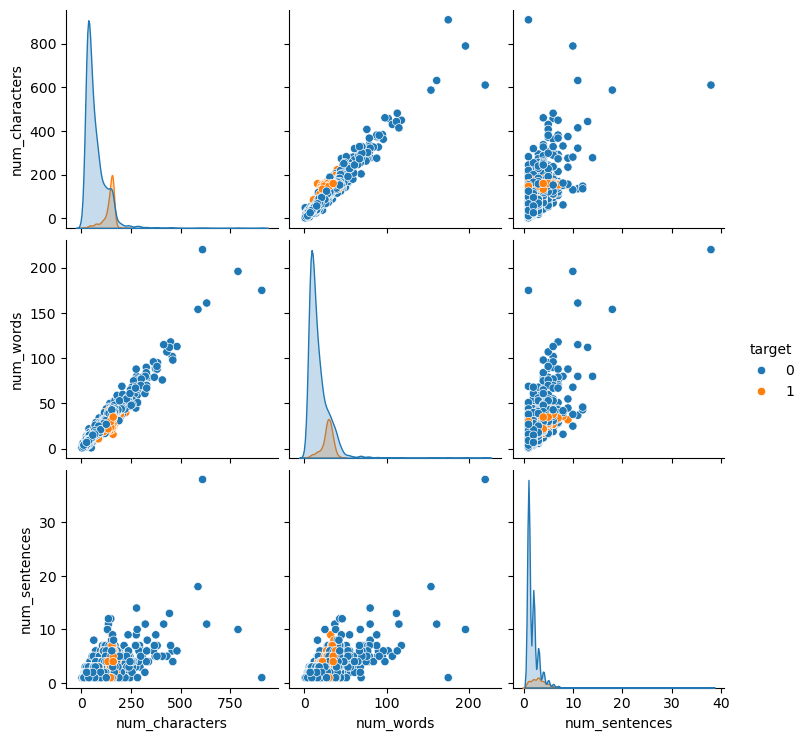

In [62]:
sns.pairplot(df, hue='target')

<Axes: >

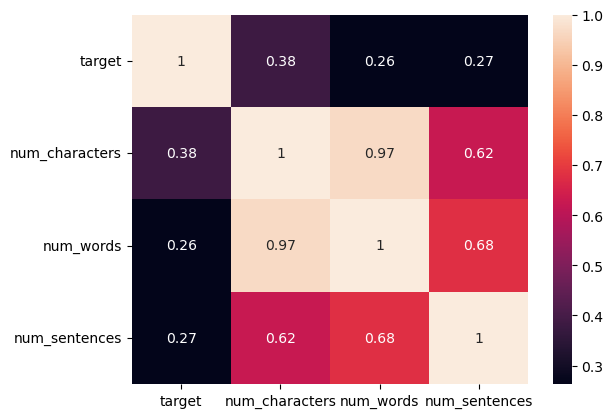

In [71]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

conclusion: 
 - there is high multicollinearity in features.
 - will select 'num_words' as its corelation is high 0.38 than other two.

## 3. Data Preprocessing
   - Lower case
   - Tokenization
   - Removing special characters
   - Removing stop words and punctuation
   - stemming

In [85]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [90]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prashant\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [86]:
ps = PorterStemmer()

In [93]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
         y.append(i)

    text = y[:]
    y.clear()
    for i in text:
       y.append(ps.stem(i))
    return " ".join(y)

In [94]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [96]:
df['transformed_text']= df['text'].apply(transform_text)

In [97]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [106]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10, background_color='white')

In [107]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

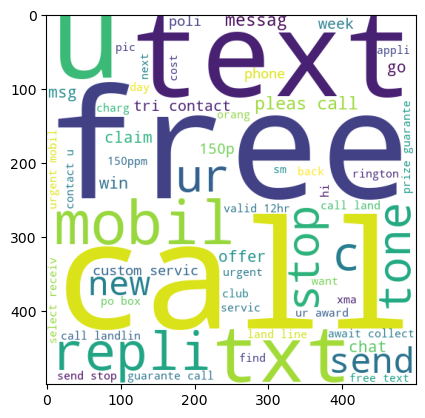

In [108]:
plt.imshow(spam_wc)

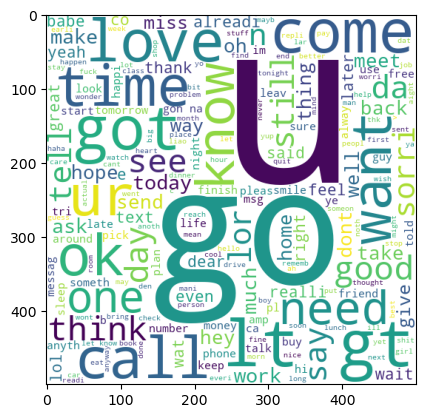

In [110]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [113]:
len(spam_corpus)

9941

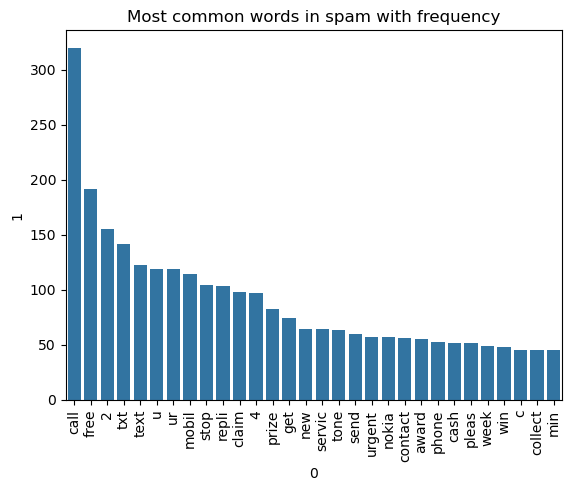

In [127]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('Most common words in spam with frequency')
plt.show()

In [150]:
#text Vectorization
#using bag of words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [147]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [151]:
xx = tfidf.fit_transform(df['transformed_text']).toarray()

In [132]:
X.shape

(5169, 6677)

In [133]:
y = df['target'].values

In [134]:
y

array([0, 0, 1, ..., 0, 0, 0])

## 4. Model Building

In [135]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(xx, y, test_size=0.2, random_state=2)

In [156]:
#assuming naive bayes perform better on textual classifers
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [138]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [153]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


In [154]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [155]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


conclusion: 
- After trying both CountVectorizer and TfidfVectorizer, Tfidf gave good results. 
- especially in case of precision score. which is imp in our case.(as data is imbalaced, accuracy is not that much reliable as precision)
- Also MultinomialNB performs better with 1.0 precision score

In [157]:
#trying diff classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [159]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [160]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    "ETC": etc,
    'GBDT': gbdt
}

In [161]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [167]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
precision -  1.0
For  NB
Accuracy -  0.9593810444874274
precision -  1.0
For  DT
Accuracy -  0.9352030947775629
precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
precision -  0.94
For  RF
Accuracy -  0.9700193423597679
precision -  0.9908256880733946


c:\Users\Prashant\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  Adaboost
Accuracy -  0.9622823984526112
precision -  0.9541284403669725
For  Bgc
Accuracy -  0.9574468085106383
precision -  0.8615384615384616
For  ETC
Accuracy -  0.97678916827853
precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9516441005802708
precision -  0.9313725490196079


In [166]:
accuracy_scores, precision_scores

([], [])

In [168]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [183]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
8,ETC,0.976789,0.991379
5,RF,0.970019,0.990826
0,SVC,0.972921,0.974138
6,Adaboost,0.962282,0.954128
4,LR,0.951644,0.940000
9,GBDT,0.951644,0.931373
7,Bgc,0.957447,0.861538
3,DT,0.935203,0.838095


NB, ETC, RF performs well with high precision while maintaining accuracy.

#### improving model

- AFter trying multiple values for max_features of Tfidf, 3000 works well.
- Also, Scaling reduces scores in NB, so i'll skip scaling

In [175]:
tfidf1 = TfidfVectorizer(max_features=3000)
X = tfidf1.fit_transform(df['transformed_text']).toarray()

In [176]:
clfs1 = {
    'NB': mnb,
    'RF': rfc,
    "ETC": etc,
}

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [180]:
accuracy_scores_new = []
precision_scores_new = []

for name, clf in clfs1.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("precision - ", current_precision)

    accuracy_scores_new.append(current_accuracy)
    precision_scores_new.append(current_precision)

For  NB
Accuracy -  0.971953578336557
precision -  1.0
For  RF
Accuracy -  0.9748549323017408
precision -  0.9827586206896551
For  ETC
Accuracy -  0.9796905222437138
precision -  0.975609756097561


In [182]:
performance_df_new = pd.DataFrame({'Algorithm':clfs1.keys(), 'Accuracy_max_ft':accuracy_scores_new, 'Precision_max_ft':precision_scores_new})
performance_df_new

,Algorithm,Accuracy_max_ft,Precision_max_ft
0,NB,0.971954,1.000000
1,RF,0.974855,0.982759
2,ETC,0.979691,0.975610


conclusion:
- Accuracy also increases in NB.

### Pickling

In [184]:
import pickle
pickle.dump(tfidf1, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))